# Preliminary plotting stuff to get things going

In [374]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

In [375]:
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = Dark2_7
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
# rcParams['patch.facecolor'] = Dark2_7[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [376]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Loading and Cleaning

In [377]:
df=pd.read_csv("../data/games_mongodump.csv")
df.head(5)

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime
0  2015-03-13T01:00:00.000Z      Washington Wizards       Memphis Grizzlies  1.259740   4.030000         107          87    False
1  2015-03-12T04:30:00.000Z   Golden State Warriors         Detroit Pistons  1.050000  11.520000         105          98    False
2  2015-03-12T04:30:00.000Z  Portland Trail Blazers         Houston Rockets  1.729927   2.160000         105         100    False
3  2015-03-12T04:00:00.000Z            Phoenix Suns  Minnesota Timberwolves  1.490196   2.720000         106          97    False
4  2015-03-12T03:00:00.000Z          Denver Nuggets           Atlanta Hawks  3.450000   1.330033         115         102    False

In [378]:
df.describe()

odd_home     odd_away   score_home   score_away   overtime
count  8304.000000  8304.000000  8304.000000  8304.000000       8304
mean      1.868061     3.349489   100.658839    97.692076  0.0611753
std       1.048794     2.545006    12.029303    11.984653   0.239666
min       1.010000     1.020000    59.000000    56.000000      False
25%       1.270000     1.770000    93.000000    90.000000          0
50%       1.540000     2.520000   100.000000    98.000000          0
75%       2.090000     3.870000   108.000000   105.000000          0
max      17.240000    23.430000   163.000000   163.000000       True

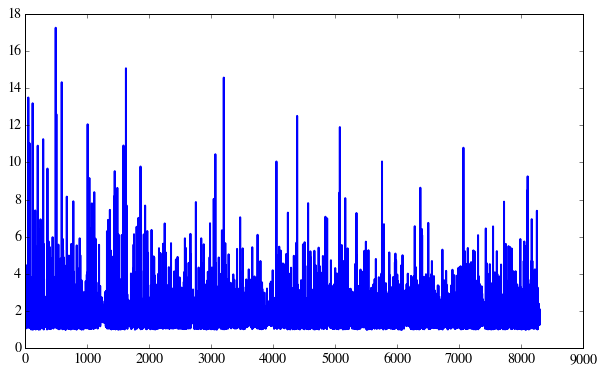

In [379]:
line = plt.figure()
plt.plot(df["odd_home"]);

## Preliminary Analysis and plotting

In [380]:
winner_group = df.groupby('home_team')
winner_group.size()

home_team
Atlanta Hawks             292
Boston Celtics            296
Brooklyn Nets             269
Charlotte Hornets         258
Chicago Bulls             292
Cleveland Cavaliers       280
Dallas Mavericks          287
Denver Nuggets            274
Detroit Pistons           252
East                        2
Golden State Warriors     272
Houston Rockets           284
Indiana Pacers            278
Los Angeles Clippers      284
Los Angeles Lakers        307
Memphis Grizzlies         282
Miami Heat                316
Milwaukee Bucks           265
Minnesota Timberwolves    254
New Orleans Pelicans      257
New York Knicks           258
Oklahoma City Thunder     296
Orlando Magic             285
Philadelphia 76ers        266
Phoenix Suns              268
Portland Trail Blazers    270
Sacramento Kings          256
San Antonio Spurs         305
Sophomores                  3
Team Chuck                  1
Toronto Raptors           265
Utah Jazz                 263
Washington Wizards        263


In [381]:
def nb_of_games(team):
    return len(df.loc[df["home_team"] == team])+len(df.loc[df["away_team"] == team])

In [382]:
teams = set(df["home_team"]).union(set(df["away_team"]))
teams

{'Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'East',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Rookies',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Sophomores',
 'Team Chuck',
 'Team Shaq',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards',
 'West'}

In [383]:
df.loc[df["home_team"] == "West"] #in df there is the allstar game, not in games_cleaned

date_time home_team away_team  odd_home  odd_away  score_home  score_away overtime
3130  2013-02-18T03:00:00.000Z      West      East      1.72      2.17         143         138    False
5332  2011-02-21T03:00:00.000Z      West      East      2.28      1.66         148         143    False
6828  2010-02-15T03:00:00.000Z      West      East      2.16      1.72         139         141    False
7913  2009-02-16T03:00:00.000Z      West      East      1.69      2.18         146         119    False

In [384]:
x = list(teams)
y = [nb_of_games(t) for t in x]
# red_dot = plt.plot(y,"ro")
# plt.legend(red_dot,x)

In [385]:
total_games = pd.DataFrame([x,y])
total_games

0              1     2                  3                     4        5                   6           7                8               9           10             11                      12    13                     14               15                  16                17                      18                    19                     20                 21               22          23                 24               25         26            27                28  \
0  Los Angeles Lakers  Chicago Bulls  West  San Antonio Spurs  New Orleans Pelicans  Rookies  Philadelphia 76ers  Sophomores  Detroit Pistons  Boston Celtics  Miami Heat  Orlando Magic  Portland Trail Blazers  East  Golden State Warriors  New York Knicks  Washington Wizards  Dallas Mavericks  Minnesota Timberwolves  Los Angeles Clippers  Oklahoma City Thunder  Charlotte Hornets  Milwaukee Bucks  Team Chuck  Memphis Grizzlies  Toronto Raptors  Utah Jazz  Phoenix Suns  Sacramento Kings   
1                 586            569     6                597                   520        3                 533           3              515             590         619            566                     552     6                    555              533                 539               567                     511                   561                    587                521              528           1                573              525        539           529               515   

                29                   30             31             32         33              34              35  
0  Houston Rockets  Cleveland Cavaliers  Atlanta Hawks  Brooklyn Nets  Team Shaq  Indiana Pacers  Denver Nuggets  
1              552                  561            591            531          1             574             549

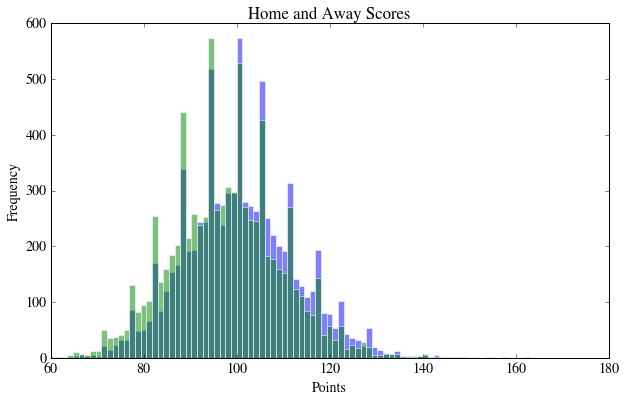

In [386]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Home and Away Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(df["score_home"],bins, alpha=0.5)
plt.hist(df["score_away"],bins, alpha=0.5)
plt.show()

In [387]:
scores = pd.DataFrame([df["score_home"],df["score_away"]])
winner_scores = scores.max(0)
looser_scores = scores.min(0)

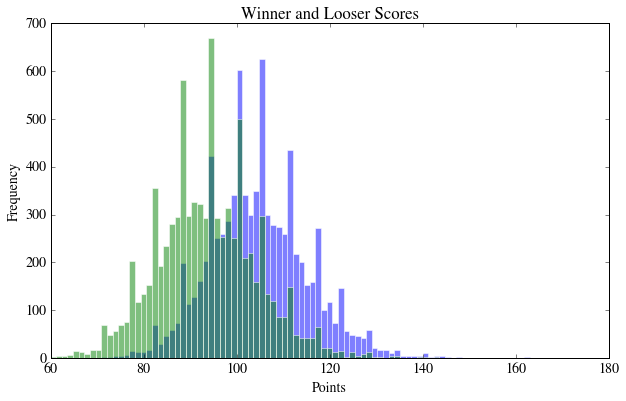

In [388]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Looser Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(winner_scores,bins, alpha=0.5)
plt.hist(looser_scores,bins, alpha=0.5)
plt.show()

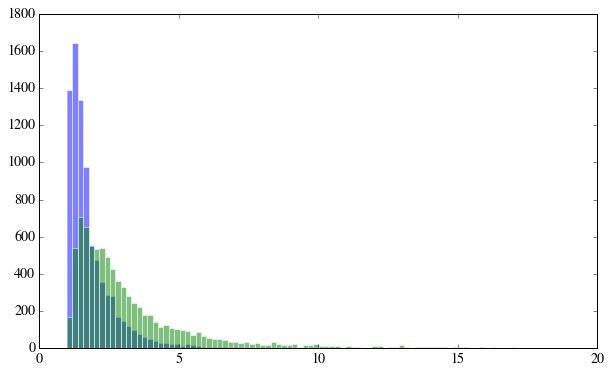

In [389]:
plt.figure()
bins = np.linspace(1, 20, 100)
plt.hist(df["odd_home"],bins, alpha=0.5);
plt.hist(df["odd_away"],bins, alpha=0.5);

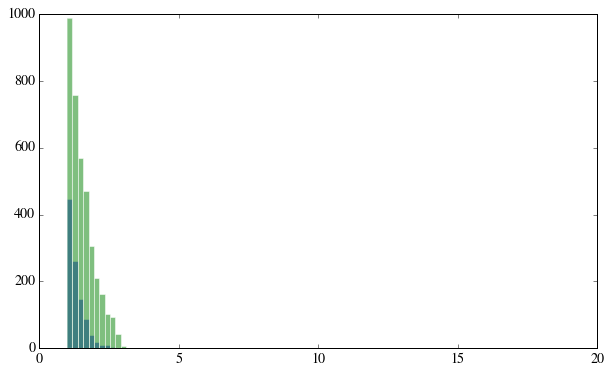

In [390]:
plt.figure()
bins = np.linspace(1, 20, 100)
plt.hist(np.log(df["odd_home"]),bins, alpha=0.5);
plt.hist(np.log(df["odd_away"]),bins, alpha=0.5); # we wanted to check if the odd_home column was following a log-normal law

## Feature Engineering

In [391]:
g = df
g.head()

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime
0  2015-03-13T01:00:00.000Z      Washington Wizards       Memphis Grizzlies  1.259740   4.030000         107          87    False
1  2015-03-12T04:30:00.000Z   Golden State Warriors         Detroit Pistons  1.050000  11.520000         105          98    False
2  2015-03-12T04:30:00.000Z  Portland Trail Blazers         Houston Rockets  1.729927   2.160000         105         100    False
3  2015-03-12T04:00:00.000Z            Phoenix Suns  Minnesota Timberwolves  1.490196   2.720000         106          97    False
4  2015-03-12T03:00:00.000Z          Denver Nuggets           Atlanta Hawks  3.450000   1.330033         115         102    False

In [392]:
# Create a feature that says "home team wins"
y = g["score_home"]>g["score_away"]
y.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

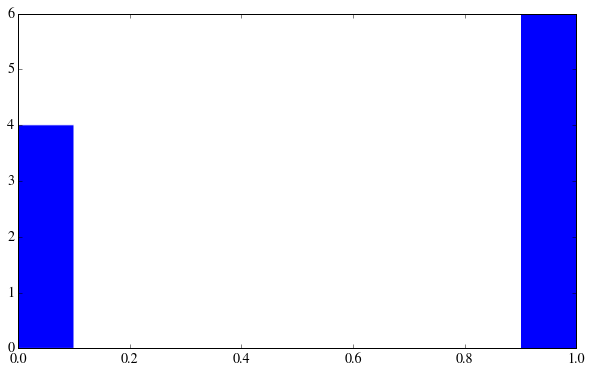

In [393]:
# Accuracy of classifier
plt.hist(y, normed=True);

The accuracy of the classifier "the home team wins" is already 60%.

In [394]:
# Create a feature that says "the lowest odd wins"
n=len(g["odd_home"])
y = g["score_home"]>g["score_away"]
y2=np.zeros(n)
odd_winner=np.zeros(n)
odd_looser=np.zeros(n)
for id in range(n):
    if y[id]:
        odd_winner[id]=g["odd_home"][id]
        odd_looser[id]=g["odd_away"][id]
    else:
        odd_winner[id]=g["odd_away"][id]
        odd_looser[id]=g["odd_home"][id]

y2 = odd_winner <= odd_looser
y2

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

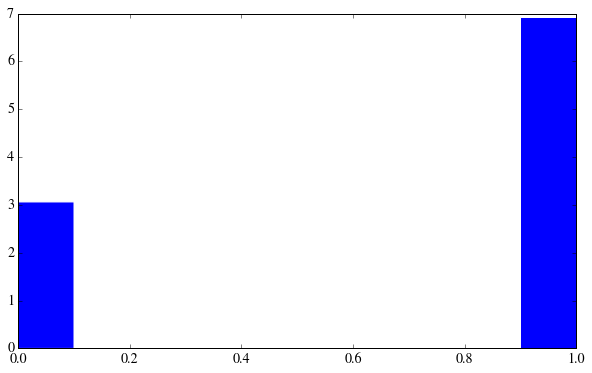

In [395]:
# Accuracy of classifier
plt.hist(y2, normed=True);

The accuracy of the classifier "the lowest odd wins" is already 70%.

In [396]:
surprise = g.loc[y2==False]

In [397]:
# Carry on error analysis on the surprise subset

In [398]:
surprise.head()

date_time              home_team             away_team  odd_home  odd_away  score_home  score_away overtime
4   2015-03-12T03:00:00.000Z         Denver Nuggets         Atlanta Hawks   3.45000  1.330033         115         102    False
6   2015-03-12T02:00:00.000Z  Oklahoma City Thunder  Los Angeles Clippers   1.37037  3.210000         108         120    False
7   2015-03-12T01:30:00.000Z         Boston Celtics     Memphis Grizzlies   3.22000  1.370370          95          92    False
9   2015-03-12T01:00:00.000Z      Charlotte Hornets      Sacramento Kings   1.25974  4.000000         106         113    False
11  2015-03-11T04:30:00.000Z     Los Angeles Lakers       Detroit Pistons   2.40000  1.609756          93          85    False

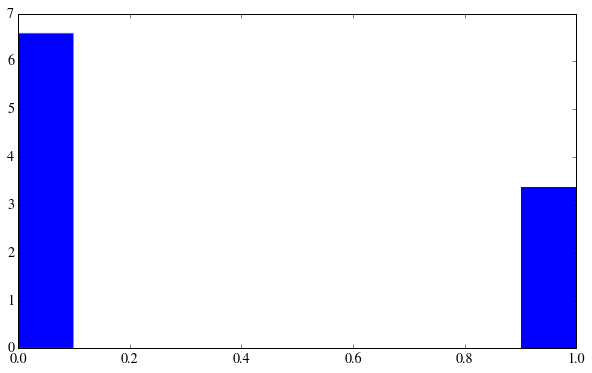

In [399]:
y3 = surprise["score_home"]>surprise["score_away"] 
plt.hist(y3, normed=True);

So when the big odd wins, 35% of the time the big odd was actually the home team

In [400]:
df.head()

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime
0  2015-03-13T01:00:00.000Z      Washington Wizards       Memphis Grizzlies  1.259740   4.030000         107          87    False
1  2015-03-12T04:30:00.000Z   Golden State Warriors         Detroit Pistons  1.050000  11.520000         105          98    False
2  2015-03-12T04:30:00.000Z  Portland Trail Blazers         Houston Rockets  1.729927   2.160000         105         100    False
3  2015-03-12T04:00:00.000Z            Phoenix Suns  Minnesota Timberwolves  1.490196   2.720000         106          97    False
4  2015-03-12T03:00:00.000Z          Denver Nuggets           Atlanta Hawks  3.450000   1.330033         115         102    False

In [401]:
y = pd.DataFrame(df["score_home"]>df["score_away"],index=np.arange(len(df["score_home"])),columns=["home_wins"])
X = df.join(y)
X.head()

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime home_wins
0  2015-03-13T01:00:00.000Z      Washington Wizards       Memphis Grizzlies  1.259740   4.030000         107          87    False      True
1  2015-03-12T04:30:00.000Z   Golden State Warriors         Detroit Pistons  1.050000  11.520000         105          98    False      True
2  2015-03-12T04:30:00.000Z  Portland Trail Blazers         Houston Rockets  1.729927   2.160000         105         100    False      True
3  2015-03-12T04:00:00.000Z            Phoenix Suns  Minnesota Timberwolves  1.490196   2.720000         106          97    False      True
4  2015-03-12T03:00:00.000Z          Denver Nuggets           Atlanta Hawks  3.450000   1.330033         115         102    False      True

In [402]:
X = X.reindex(np.random.permutation(X.index))
m = np.ceil(len(X)*0.7)
X_train = X.iloc[0:m]
X_test = X.iloc[m:len(X)]

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: slice indexers when using iloc should be integers and not floating point
  app.launch_new_instance()
/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: slice indexers when using iloc should be integers and not floating point


In [403]:
X_test.head()

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime home_wins
175   2015-03-26T03:00:00.000Z               Utah Jazz  Portland Trail Blazers      1.80   2.040000          89          92    False     False
7214  2009-12-03T05:30:00.000Z    Los Angeles Clippers         Houston Rockets      2.16   1.720000          85         102    False     False
4501  2012-02-15T05:00:00.000Z  Portland Trail Blazers      Washington Wizards      1.03  14.000000         109         124    False     False
7514  2009-03-29T21:30:00.000Z           Atlanta Hawks      Los Angeles Lakers      2.42   1.581395          86          76    False      True
427   2015-03-03T02:30:00.000Z              Miami Heat            Phoenix Suns      1.79   2.080000         115          98    False      True

# Plot in the space of features

In [404]:
type(X_train)

pandas.core.frame.DataFrame

In [405]:
X_train.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz      2.16  1.719424         140         129     True      True
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks      1.16  5.570000         113         106     True      True
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets      1.39  3.100000         101         103    False     False
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets      1.08  8.680000         101         100    False      True
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks      2.11  1.740000         111         104    False      True

In [406]:
X_train[['odd_home','odd_away','home_wins']].head()

odd_home  odd_away home_wins
7604      2.16  1.719424      True
3559      1.16  5.570000      True
7177      1.39  3.100000     False
3671      1.08  8.680000      True
6296      2.11  1.740000      True

In [407]:
def plot_feature_space(X,x1,x2):
    plt.scatter(X[x1][X['home_wins']==True],X[x2][X['home_wins']==True],color='g',alpha=.5)
    plt.scatter(X[x1][X['home_wins']==False],X[x2][X['home_wins']==False],color='r',alpha=.5)
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.grid(True)
    plt.xlim([0,25])
    plt.ylim([0,25])
    plt.axis('equal')
    remove_border()

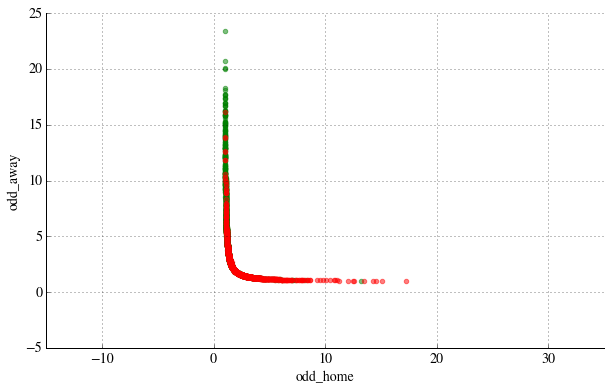

In [408]:
plot_feature_space(X_train,'odd_home','odd_away')

The two areas of data clearly overlap so it's hard to draw a decision boundary just yet.

# Feature Scaling

In [409]:
def apply_feature_scaling(X_j):
    return (X_j - np.mean(X_j))/(np.max(X_j)-np.min(X_j))

In [410]:
def feature_scale(X,x_array):
    for x_i in x_array:
        X[x_i]=apply_feature_scaling(X[x_i]);

In [411]:
feature_scale(X_train,['odd_home','odd_away']);

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [412]:
X_train.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz  0.016745 -0.071433         140         129     True      True
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks -0.044869  0.100391         113         106     True      True
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets -0.030698 -0.009827         101         103    False     False
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets -0.049798  0.239169         101         100    False      True
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks  0.013664 -0.070514         111         104    False      True

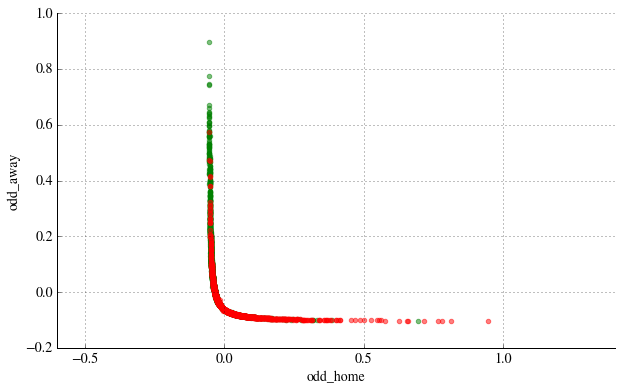

In [413]:
plot_feature_space(X_train,'odd_home','odd_away')

# Feature Mapping

In [414]:
x1 = pd.DataFrame(1/X_train['odd_home'])
x1 = x1.rename(columns={'odd_home':'inverse_odd_home'})
x1.head()

inverse_odd_home
7604         59.718620
3559        -22.287054
7177        -32.575613
3671        -20.081030
6296         73.182433

In [415]:
X_train_map = X_train
X_train_map = pd.concat([X_train_map,x1],axis=1)
X_train_map.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins  inverse_odd_home
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz  0.016745 -0.071433         140         129     True      True         59.718620
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks -0.044869  0.100391         113         106     True      True        -22.287054
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets -0.030698 -0.009827         101         103    False     False        -32.575613
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets -0.049798  0.239169         101         100    False      True        -20.081030
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks  0.013664 -0.070514         111         104    False      True         73.182433

In [416]:
feature_scale(X_train_map,['inverse_odd_home']);

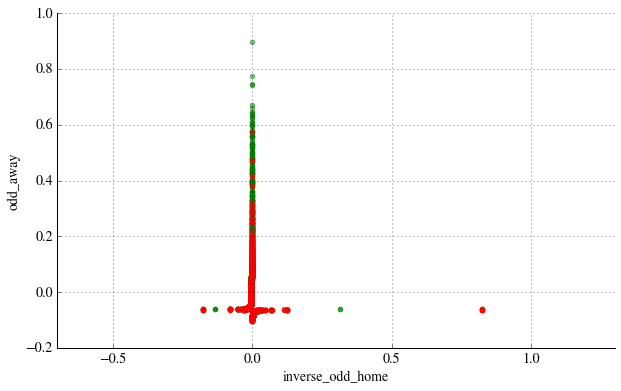

In [417]:
plot_feature_space(X_train_map,'inverse_odd_home','odd_away')

In [418]:
x2 = pd.DataFrame(1/X_train['odd_away'])
x2 = x2.rename(columns={'odd_away':'inverse_odd_away'})
x2.head()

inverse_odd_away
7604        -13.999214
3559          9.961012
7177       -101.757902
3671          4.181148
6296        -14.181493

In [419]:
X_train_map = pd.concat([X_train_map,x2],axis=1)
X_train_map.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins  inverse_odd_home  inverse_odd_away
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz  0.016745 -0.071433         140         129     True      True          0.005692        -13.999214
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks -0.044869  0.100391         113         106     True      True         -0.001683          9.961012
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets -0.030698 -0.009827         101         103    False     False         -0.002608       -101.757902
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets -0.049798  0.239169         101         100    False      True         -0.001485          4.181148
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks  0.013664 -0.070514         111         104    False      True          0.006903        -14.181493

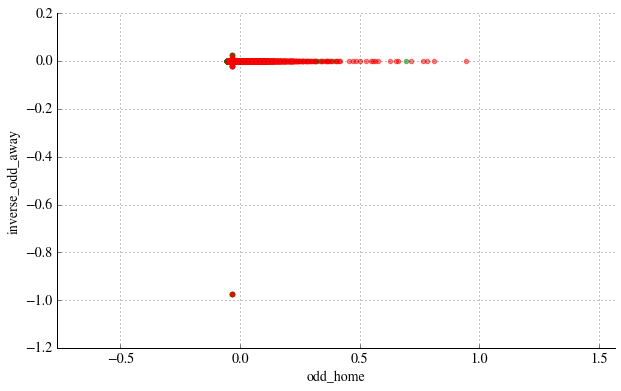

In [420]:
feature_scale(X_train_map,['inverse_odd_away']);
plot_feature_space(X_train_map,'odd_home','inverse_odd_away')

In [421]:
x3 = pd.DataFrame(X_train['odd_away']**2)
x3 = x3.rename(columns={'odd_away':'square_odd_away'})
x3.head()

square_odd_away
7604         0.005103
3559         0.010078
7177         0.000097
3671         0.057202
6296         0.004972

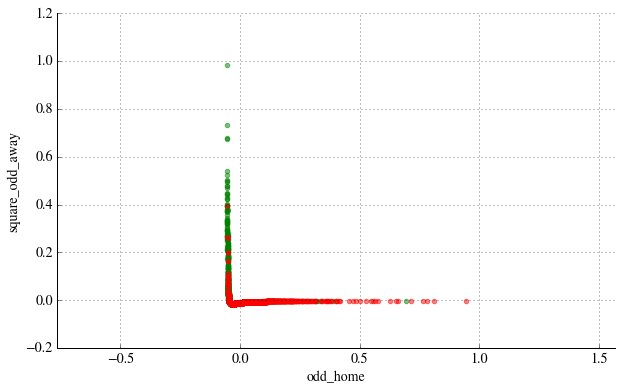

In [422]:
X_train_map = pd.concat([X_train_map,x3],axis=1)
feature_scale(X_train_map,['square_odd_away']);
plot_feature_space(X_train_map,'odd_home','square_odd_away')

In [423]:
x4 = pd.DataFrame(X_train['odd_home']**2)
x4 = x4.rename(columns={'odd_home':'square_odd_home'})
x4.head()

square_odd_home
7604         0.000280
3559         0.002013
7177         0.000942
3671         0.002480
6296         0.000187

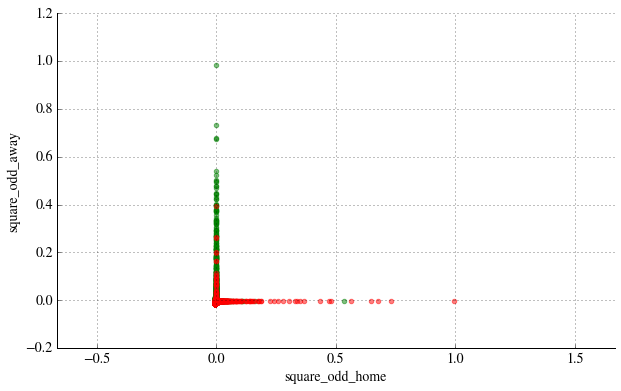

In [424]:
X_train_map = pd.concat([X_train_map,x4],axis=1)
feature_scale(X_train_map,['square_odd_home']);
plot_feature_space(X_train_map,'square_odd_home','square_odd_away')

In [425]:
x5 = pd.DataFrame(X_train['odd_home']*X_train['odd_away'])
x5 = x5.rename(columns={0:'product_odds'})
x5.head()

product_odds
7604     -0.001196
3559     -0.004504
7177      0.000302
3671     -0.011910
6296     -0.000964

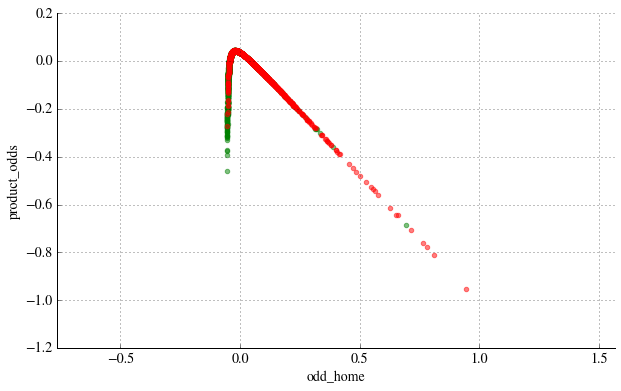

In [426]:
X_train_map = pd.concat([X_train_map,x5],axis=1)
feature_scale(X_train_map,['product_odds']);
plot_feature_space(X_train_map,'odd_home','product_odds')

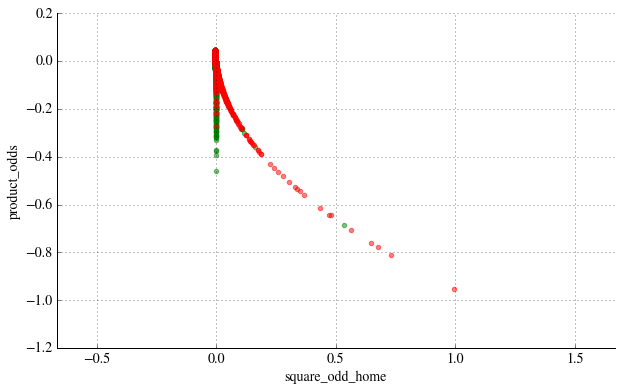

In [427]:
plot_feature_space(X_train_map,'square_odd_home','product_odds')

In [428]:
X_train_map.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins  inverse_odd_home  inverse_odd_away  square_odd_away  square_odd_home  product_odds
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz  0.016745 -0.071433         140         129     True      True          0.005692          0.001308        -0.009118        -0.004849      0.023692
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks -0.044869  0.100391         113         106     True      True         -0.001683          0.001546        -0.002939        -0.002912     -0.010065
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets -0.030698 -0.009827         101         103    False     False         -0.002608          0.000433        -0.015335        -0.004109      0.038975
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets -0.049798  0.239169         101         100    False      True         -0.001485          0.001489         0.055581        -0.002390     -0.085629
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks  0.013664 -0.070514         111         104    False      True          0.006903          0.001306        -0.009280        -0.004953      0.026065

In [447]:
def odds_feature_mapping(X):
    x0 = pd.DataFrame(X['odd_away']-X['odd_home'])
    x0 = x0.rename(columns={0:'difference_odds'})
    x1 = pd.DataFrame(1/X['odd_home'])
    x1 = x1.rename(columns={'odd_home':'inverse_odd_home'})
    x2 = pd.DataFrame(1/X['odd_away'])
    x2 = x2.rename(columns={'odd_away':'inverse_odd_away'})
    x3 = pd.DataFrame(X['odd_away']**2)
    x3 = x3.rename(columns={'odd_away':'square_odd_away'})
    x4 = pd.DataFrame(X['odd_home']**2)
    x4 = x4.rename(columns={'odd_home':'square_odd_home'})
    x5 = pd.DataFrame(X['odd_home']*X['odd_away'])
    x5 = x5.rename(columns={0:'product_odds'})
    X_mapped = pd.concat([X,x0,x1,x2,x4,x3,x5],axis=1)
    feature_scale(X_mapped,['odd_home','odd_away','difference_odds','inverse_odd_home',
                            'inverse_odd_away','square_odd_home','square_odd_away','product_odds']);
    return X_mapped

In [448]:
X_train_map = odds_feature_mapping(X_train)

In [449]:
X_train_map.head()

date_time           home_team          away_team  odd_home  odd_away  score_home  score_away overtime home_wins  difference_odds  inverse_odd_home  inverse_odd_away  square_odd_home  square_odd_away  product_odds
7604  2009-03-14T19:00:00.000Z          Miami Heat          Utah Jazz  0.016745 -0.071433         140         129     True      True        -0.044089          0.005692          0.001308        -0.004849        -0.009118      0.023692
3559  2012-11-22T02:30:00.000Z          Miami Heat    Milwaukee Bucks -0.044869  0.100391         113         106     True      True         0.072630         -0.001683          0.001546        -0.002912        -0.002939     -0.010065
7177  2009-12-09T03:00:00.000Z       Chicago Bulls      Brooklyn Nets -0.030698 -0.009827         101         103    False     False         0.010435         -0.002608          0.000433        -0.004109        -0.015335      0.038975
3671  2012-12-19T05:30:00.000Z  Los Angeles Lakers  Charlotte Hornets -0.049798  0.239169         101         100    False      True         0.144483         -0.001485          0.001489        -0.002390         0.055581     -0.085629
6296  2010-04-27T02:30:00.000Z     Milwaukee Bucks      Atlanta Hawks  0.013664 -0.070514         111         104    False      True        -0.042089          0.006903          0.001306        -0.004953        -0.009280      0.026065

# Logistic Regression

In [432]:
from sklearn.linear_model import LogisticRegression

In [433]:
classifier = LogisticRegression()

In [454]:
fit_features = ['odd_home','odd_away','difference_odds','inverse_odd_home','inverse_odd_away',
                'square_odd_home','square_odd_away','product_odds']
X = X_train_map[fit_features]
y = X_train_map['home_wins']
classifier.fit(X ,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [455]:
classifier.score(X,y)

0.68725270944434891

In [435]:
X_test.head()

date_time               home_team               away_team  odd_home   odd_away  score_home  score_away overtime home_wins
175   2015-03-26T03:00:00.000Z               Utah Jazz  Portland Trail Blazers      1.80   2.040000          89          92    False     False
7214  2009-12-03T05:30:00.000Z    Los Angeles Clippers         Houston Rockets      2.16   1.720000          85         102    False     False
4501  2012-02-15T05:00:00.000Z  Portland Trail Blazers      Washington Wizards      1.03  14.000000         109         124    False     False
7514  2009-03-29T21:30:00.000Z           Atlanta Hawks      Los Angeles Lakers      2.42   1.581395          86          76    False      True
427   2015-03-03T02:30:00.000Z              Miami Heat            Phoenix Suns      1.79   2.080000         115          98    False      True

In [452]:
X_test_map = odds_feature_mapping(X_test)

In [453]:
X_test_map.head()

date_time               home_team               away_team  odd_home  odd_away  score_home  score_away overtime home_wins  difference_odds  inverse_odd_home  inverse_odd_away  square_odd_home  square_odd_away  product_odds
175   2015-03-26T03:00:00.000Z               Utah Jazz  Portland Trail Blazers -0.001929 -0.068376          89          92    False     False        -0.043710         -0.085763          0.086568        -0.006404        -0.032409     -0.074413
7214  2009-12-03T05:30:00.000Z    Los Angeles Clippers         Houston Rockets  0.031129 -0.084257          85         102    False     False        -0.065617         -0.187955          0.186310         0.003736        -0.035095     -0.072026
4501  2012-02-15T05:00:00.000Z  Portland Trail Blazers      Washington Wizards -0.072636  0.525173         109         124    False     False         0.366406          0.372612         -0.371429        -0.021904         0.395865      0.519337
7514  2009-03-29T21:30:00.000Z           Atlanta Hawks      Los Angeles Lakers  0.055004 -0.091135          86          76    False      True        -0.078459         -0.242852          0.242042         0.012206        -0.036116     -0.065851
427   2015-03-03T02:30:00.000Z              Miami Heat            Phoenix Suns -0.002847 -0.066391         115          98    False      True        -0.042099         -0.082338          0.076258        -0.006659        -0.032041     -0.071584

In [456]:
X = X_test_map[fit_features]
classifier.predict(X)

array([False, False,  True, ...,  True,  True, False], dtype=bool)

In [457]:
X = X_test_map[fit_features]
y = X_test_map['home_wins']
classifier.score(X,y)

0.69931754315535932

Même après le feature mapping, on plafonne toujours à 70%

# Random Forest

In [458]:
from sklearn.ensemble import RandomForestClassifier

In [459]:
classifier = RandomForestClassifier()

In [464]:
fit_features = ['odd_home','odd_away','difference_odds','inverse_odd_home','inverse_odd_away',
                'square_odd_home','square_odd_away','product_odds']
X = X_train_map[fit_features]
y = X_train_map['home_wins']
classifier.fit(X ,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [465]:
X = X_test_map[fit_features]
y = X_test_map['home_wins']
classifier.score(X,y)

0.55038137294259337

Les résultats d'une random forest sont encore pires

# SVM

In [466]:
from sklearn import svm

In [481]:
classifier = svm.SVC(kernel='rbf')

In [482]:
X = X_train_map[fit_features]
y = X_train_map['home_wins']
classifier.fit(X ,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [483]:
X = X_test_map[fit_features]
y = X_test_map['home_wins']
classifier.score(X,y)

0.65274989963869934

The SVM with radial basis function kernel performs less good than SVM with linear

# Regularization

In [500]:
lambada = [0.01]
for n in range(10):
    lambada.append(2*lambada[len(lambada)-1])
lambada

[0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24]

In [501]:
lambada = np.array(lambada)

In [502]:
C = 1/lambada

In [503]:
C

array([  1.00000000e+02,   5.00000000e+01,   2.50000000e+01,
         1.25000000e+01,   6.25000000e+00,   3.12500000e+00,
         1.56250000e+00,   7.81250000e-01,   3.90625000e-01,
         1.95312500e-01,   9.76562500e-02])

In [506]:
scores=np.zeros(11)
for i in range(11):
    classifier = LogisticRegression(C=C[i])
    X = X_train_map[fit_features]
    y = X_train_map['home_wins']
    classifier.fit(X ,y)
    X = X_test_map[fit_features]
    y = X_test_map['home_wins']
    scores[i] = classifier.score(X,y)

In [507]:
scores

array([ 0.69530309,  0.6989161 ,  0.7025291 ,  0.70212766,  0.703332  ,
        0.70413489,  0.69851465,  0.69931754,  0.69971899,  0.70212766,
        0.69690887])

In [508]:
lambada[5]

0.32000000000000001

In [509]:
C[5]

3.125

Even if we didn't use a cross validation set to fit the regularization parameter, we get that C=3.125 gives better results

# Feature Engineering